# apartment-hunter

Data processing: cleaning, transforming, and making data suitable for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from appartment_hunter import *
import seaborn as sns

In [2]:
df_kc = pd.read_csv('../data/kc_house_data.csv')
df_kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Conversion des colonnes de pieds carrés en mètres carrés
for col in ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]:
    df_kc[col] = df_kc[col] * 0.092903
    
df_kc = df_kc.rename(columns={"sqft_living" : "m2_living", "sqft_lot" : "m2_lot", "sqft_above" : "m2_above", "sqft_basement" : "m2_basement", "sqft_living15" : "m2_living15", "sqft_lot15" : "m2_lot15"})

df_kc["waterfront"] = df_kc["waterfront"].replace({
    1 : True, 
    0 : False
    })

df_kc["yr_renovated"] = df_kc["yr_renovated"].replace({
    0 : np.nan
    })

df_kc["m2_price"] = df_kc["price"] / df_kc["m2_living"]

In [4]:
df_kc.shape

(21613, 22)

In [5]:
df_kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'm2_living', 'm2_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'm2_above',
       'm2_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'm2_living15', 'm2_lot15', 'm2_price'],
      dtype='object')

In [6]:
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21613 non-null  int64  
 1   date          21613 non-null  object 
 2   price         21613 non-null  float64
 3   bedrooms      21613 non-null  int64  
 4   bathrooms     21613 non-null  float64
 5   m2_living     21613 non-null  float64
 6   m2_lot        21613 non-null  float64
 7   floors        21613 non-null  float64
 8   waterfront    21613 non-null  bool   
 9   view          21613 non-null  int64  
 10  condition     21613 non-null  int64  
 11  grade         21613 non-null  int64  
 12  m2_above      21613 non-null  float64
 13  m2_basement   21613 non-null  float64
 14  yr_built      21613 non-null  int64  
 15  yr_renovated  914 non-null    float64
 16  zipcode       21613 non-null  int64  
 17  lat           21613 non-null  float64
 18  long          21613 non-nu

In [7]:
df_kc.describe()

,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,view,condition,grade,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,m2_price
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,914.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,193.228925,1403.482608,1.494309,0.234303,3.409430,7.656873,166.146860,27.082065,1971.005136,1995.827133,98077.939805,47.560053,-122.213896,184.556686,1186.227835,2843.359135
std,2.876566e+09,3.671272e+05,0.930062,0.770163,85.325915,3848.089781,0.539989,0.766318,0.650743,1.175459,76.932136,41.116549,29.373411,15.517107,53.505026,0.138564,0.140828,63.674908,2536.640200,1184.685024
min,1.000102e+06,7.500000e+04,0.000000,0.000000,26.941870,48.309560,1.000000,0.000000,1.000000,1.000000,26.941870,0.000000,1900.000000,1934.000000,98001.000000,47.155900,-122.519000,37.068297,60.479853,942.792324
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,132.572581,468.231120,1.000000,0.000000,3.000000,7.000000,110.554570,0.000000,1951.000000,1987.000000,98033.000000,47.471000,-122.328000,138.425470,473.805300,1962.172015
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,177.444730,707.735054,1.500000,0.000000,3.000000,7.000000,144.928680,0.000000,1975.000000,2000.000000,98065.000000,47.571800,-122.230000,170.941520,707.920860,2633.333151
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,236.902650,992.947264,2.000000,0.000000,4.000000,8.000000,205.315630,52.025680,1997.000000,2007.000000,98118.000000,47.678000,-122.125000,219.251080,936.740949,3426.401530
max,9.900000e+09,7.700000e+06,33.000000,8.000000,1257.906620,153416.205177,3.500000,4.000000,5.000000,13.000000,874.217230,447.792460,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,576.927630,80937.093600,8720.266180


In [8]:
df_kc.describe(include='object')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [9]:
df_kc.nunique()

id              21436
date              372
price            4028
bedrooms           13
bathrooms          30
m2_living        1038
m2_lot           9782
floors              6
waterfront          2
view                5
condition           5
grade              12
m2_above          946
m2_basement       306
yr_built          116
yr_renovated       69
zipcode            70
lat              5034
long              752
m2_living15       777
m2_lot15         8689
m2_price        17112
dtype: int64

Valeurs manquantes

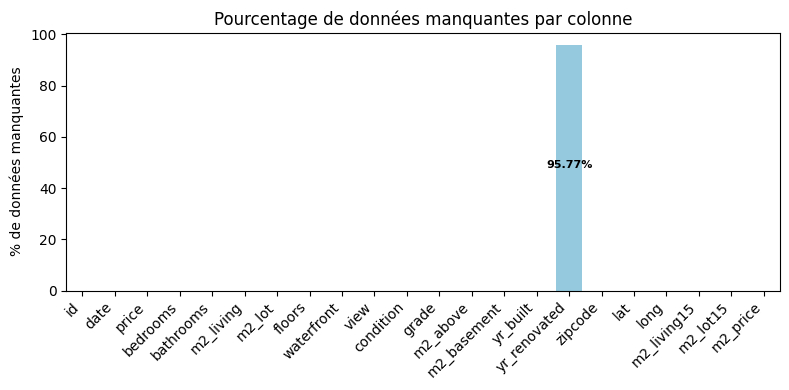

In [10]:
# Calculer le pourcentage de données manquantes par colonne
pourcentage_manquant_par_colonne = df_kc.copy()
pourcentage_manquant_par_colonne = pourcentage_manquant_par_colonne.isnull().sum() / len(df_kc) * 100

# Créer le graphique à barres
plt.figure(figsize=(8, 4))
sns.barplot(pourcentage_manquant_par_colonne, color='skyblue')
plt.title('Pourcentage de données manquantes par colonne')
plt.ylabel("% de données manquantes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



# Ajouter les valeurs non nulles au-dessus de chaque barre
for i, v in enumerate(pourcentage_manquant_par_colonne.values):
    if v != 0:  # Vérifier si la valeur est non nulle
        plt.text(i, (v / 2) - 1, f"{round(v, 2)}%", ha='center', va='bottom', fontsize=8, fontweight='bold')
        

plt.show()

## Analyse univariée

### Variables quantitatives

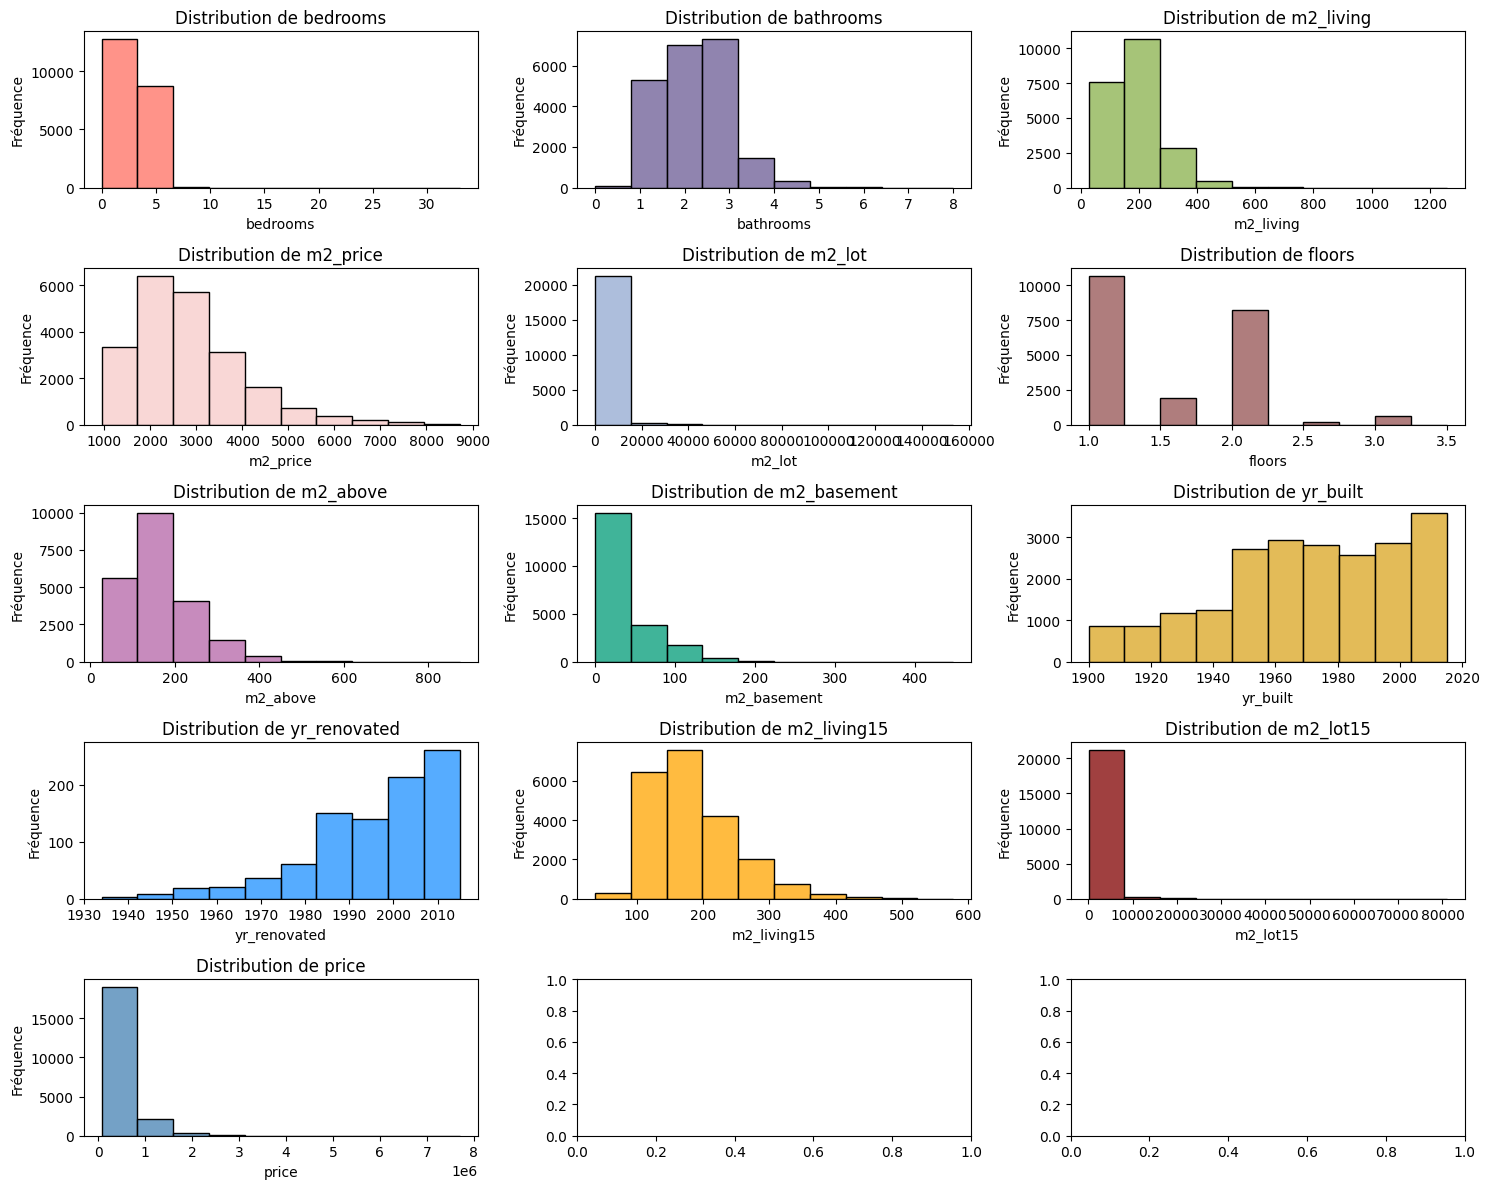

In [11]:
# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(5, 3, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors_quantitative)):
    
    # Identifier les sous-graphiques
    row = i // 3  # Calcul de la ligne
    col = i % 3   # Calcul de la colonne

    # Histogramme des données brutes
    sns.histplot(df_kc[variable], bins=10, color=color, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution de {variable}')
    axes[row, col].set_ylabel('Fréquence')
    
    if row == 4 and col >= 1:
        axes[row, col].axis('off')
        

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

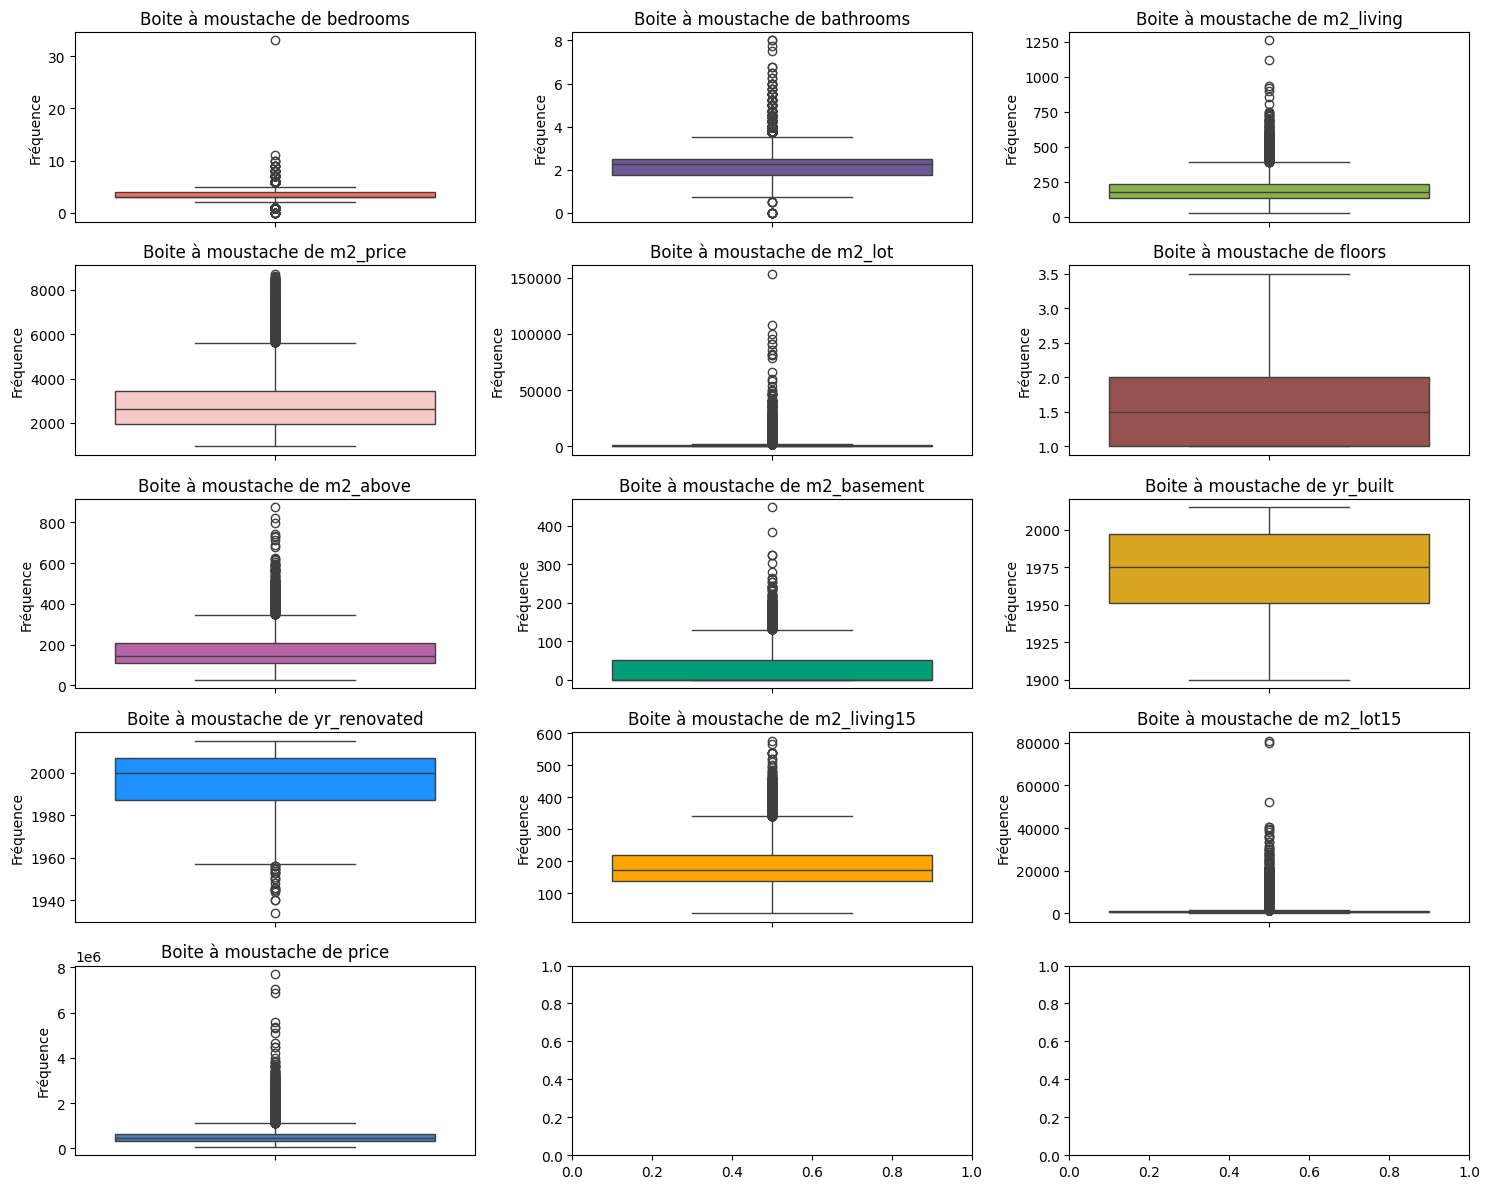

In [12]:
# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(5, 3, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors_quantitative)):
    
    # Identifier les sous-graphiques
    row = i // 3  # Calcul de la ligne
    col = i % 3   # Calcul de la colonne

    # Boîte à moustaches
    sns.boxplot(df_kc[variable], patch_artist=True, boxprops=dict(facecolor=color), ax=axes[row, col])
    axes[row, col].set_title(f'Boite à moustache de {variable}')
    axes[row, col].set_ylabel('Fréquence')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

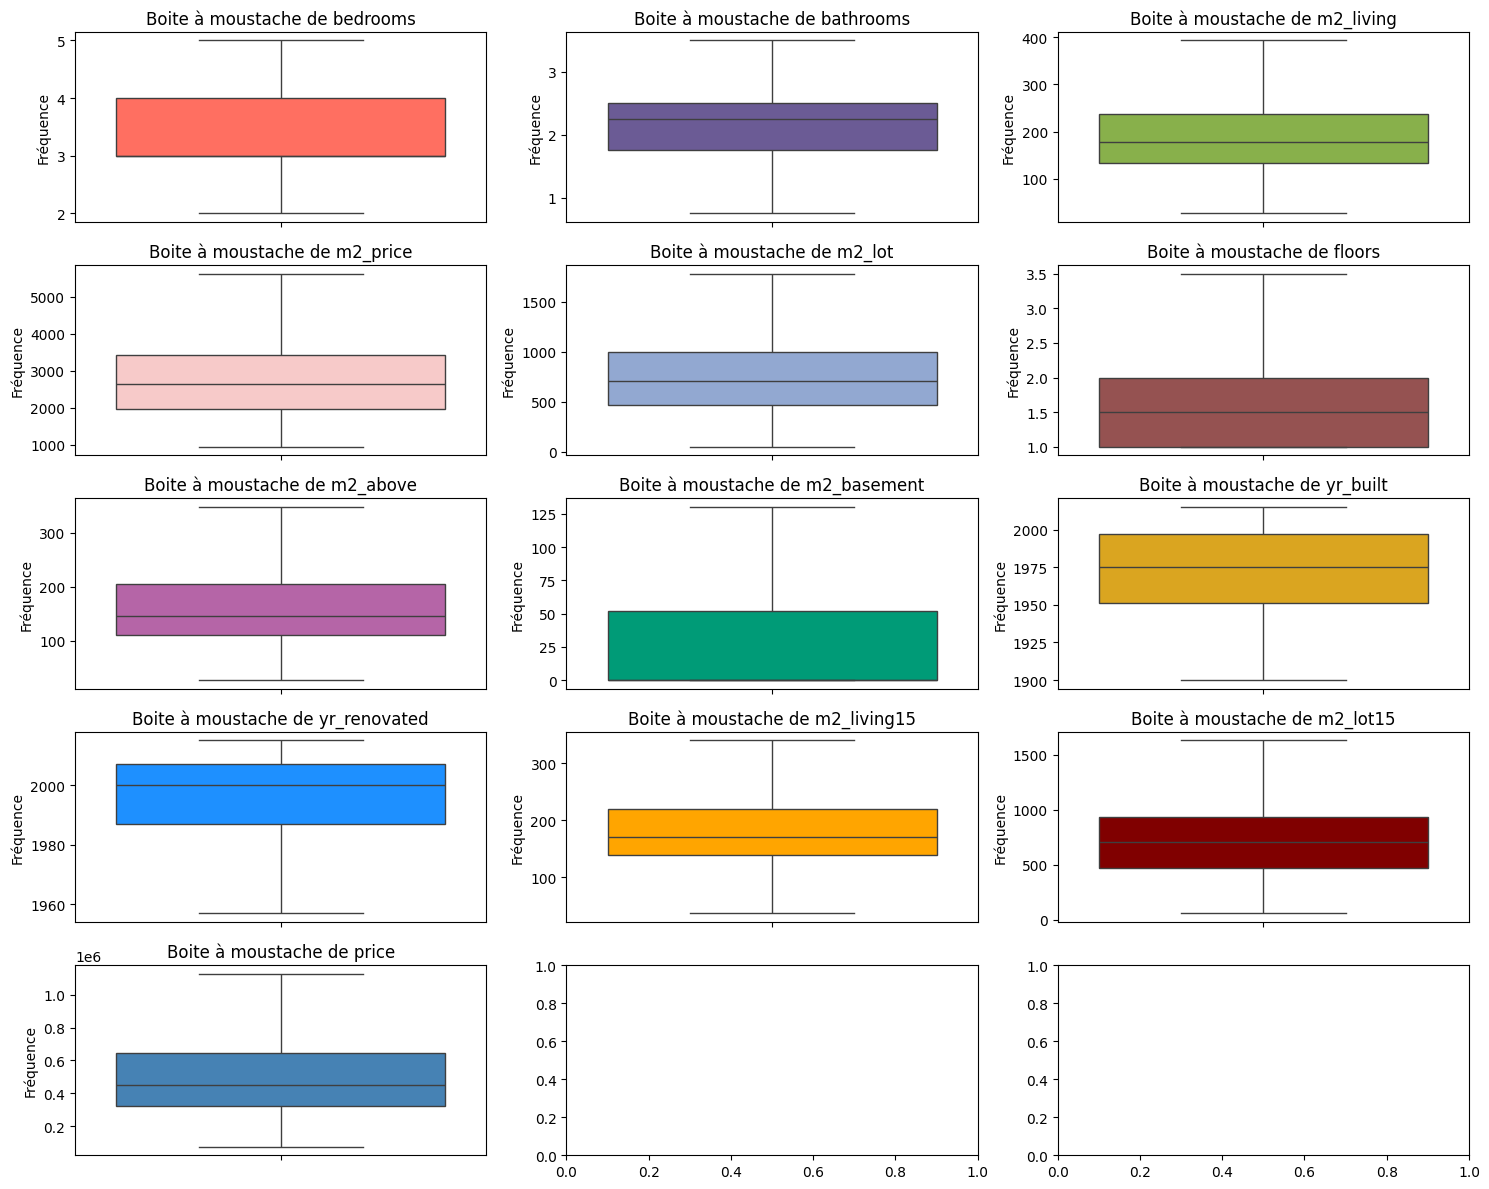

In [13]:
# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(5, 3, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors_quantitative)):
    
    # Identifier les sous-graphiques
    row = i // 3  # Calcul de la ligne
    col = i % 3   # Calcul de la colonne

    # Boîte à moustaches
    sns.boxplot(df_kc[variable], patch_artist=True, boxprops=dict(facecolor=color), ax=axes[row, col], showfliers=False)
    axes[row, col].set_title(f'Boite à moustache de {variable}')
    axes[row, col].set_ylabel('Fréquence')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

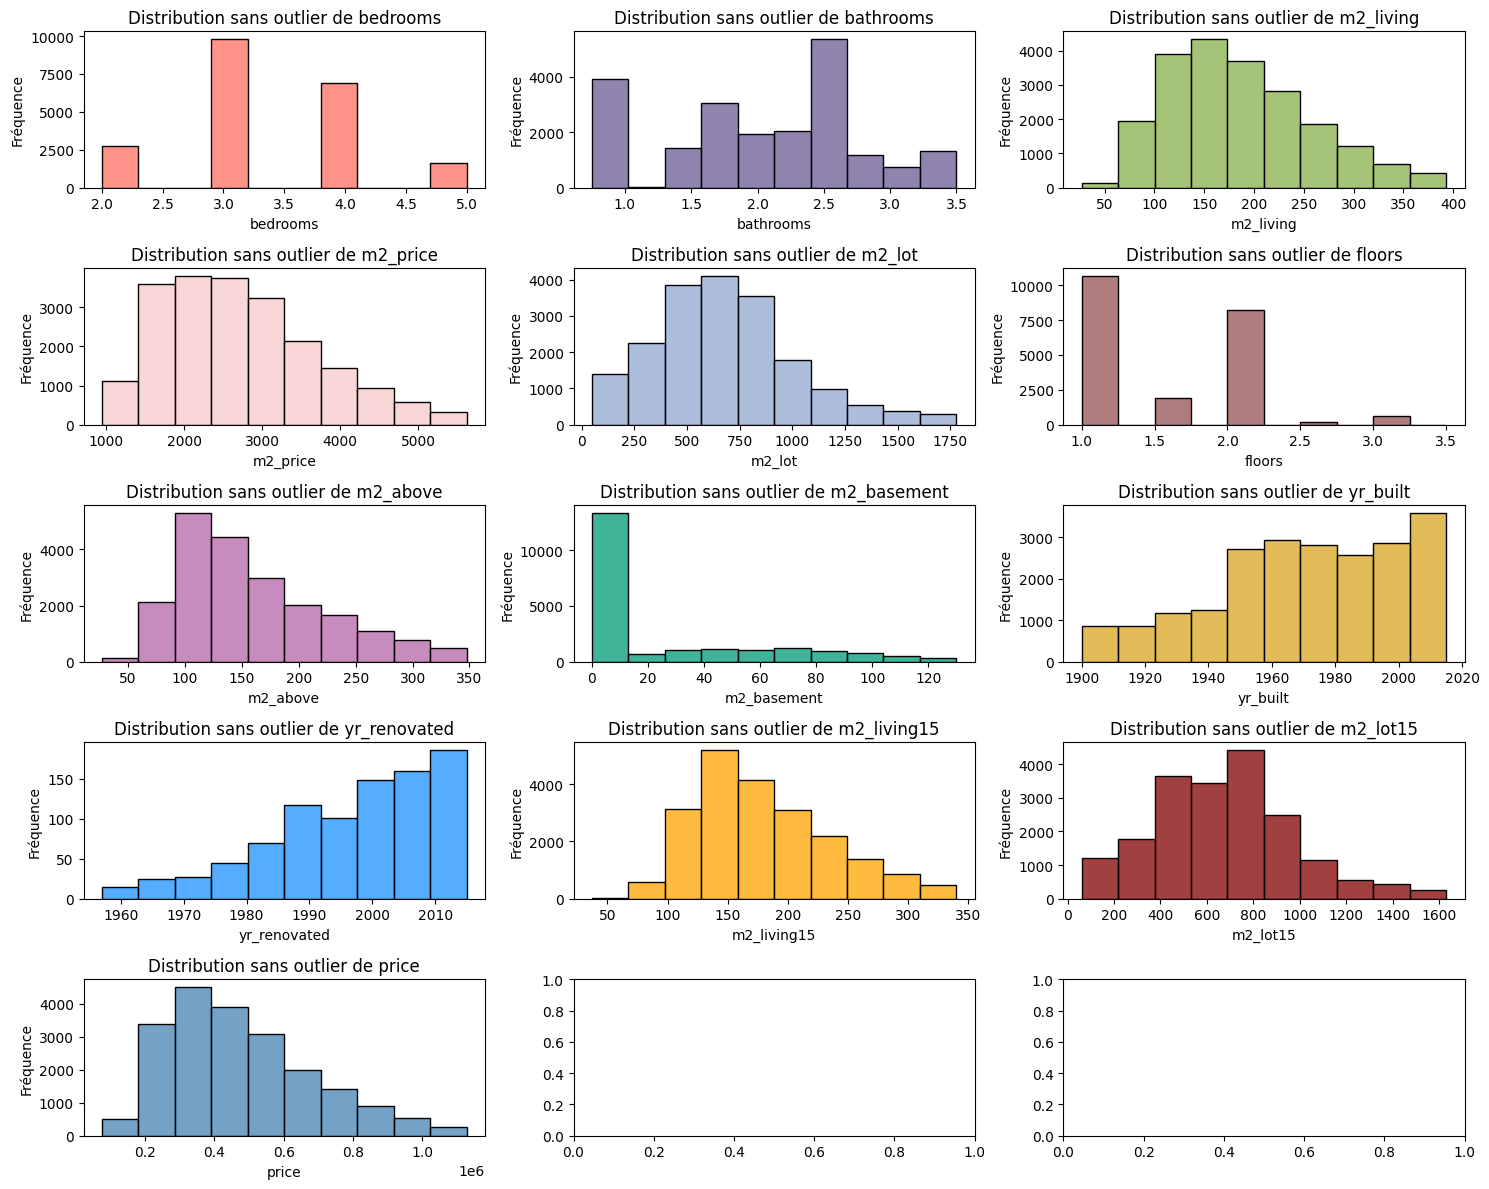

In [14]:
# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(5, 3, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors_quantitative)):
    
    # Identifier les sous-graphiques
    row = i // 3  # Calcul de la ligne
    col = i % 3   # Calcul de la colonne

    # Histogramme des données filtrées (sans valeurs aberrantes)
    Q1 = df_kc[variable].quantile(0.25)
    Q3 = df_kc[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_kc_filtred = df_kc[(df_kc[variable] >= lower_bound) & (df_kc[variable] <= upper_bound)]
    
    sns.histplot(df_kc_filtred[variable], bins=10, color=color, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution sans outlier de {variable}')
    axes[row, col].set_ylabel('Fréquence')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

### Variables qualitatives

In [15]:
df_kc["view"].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

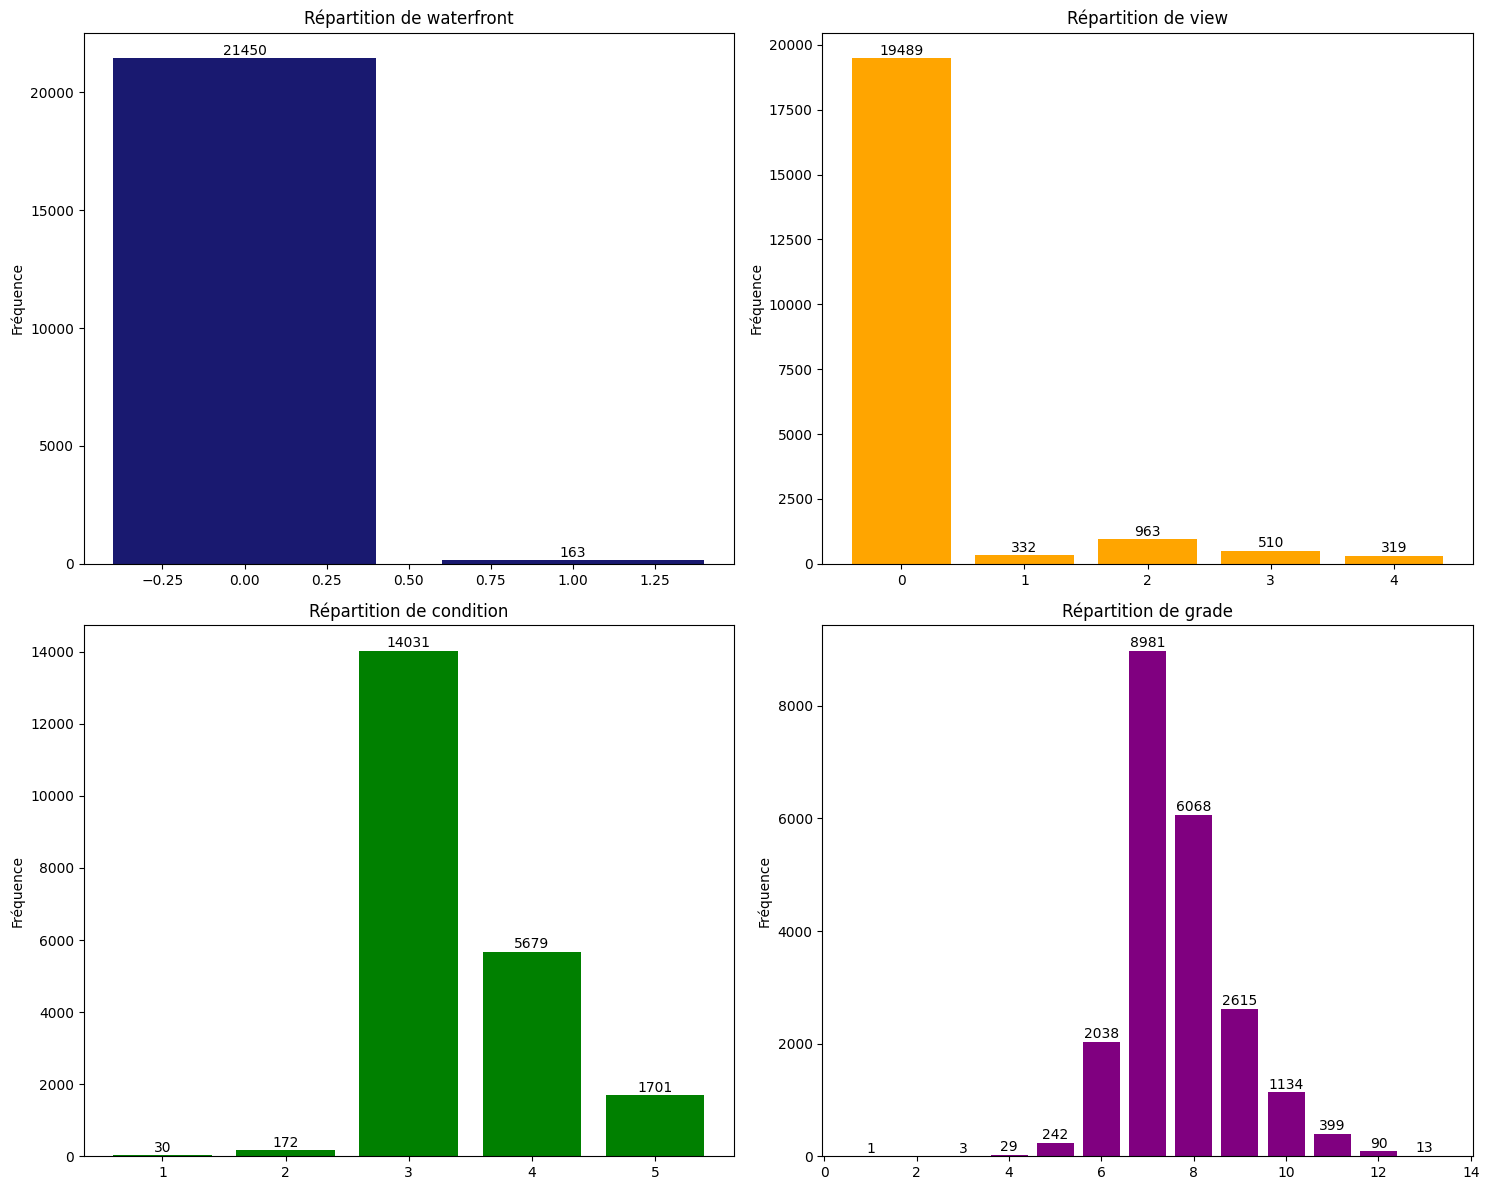

In [16]:
# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors_qualitative)):
    # Compter les occurrences de chaque catégorie
    counts = df_kc[variable].value_counts()
    
    # Identifier les sous-graphiques
    row = i // 2  # Calcul de la ligne
    col = i % 2   # Calcul de la colonne

    # Diagramme en barres
    ax = axes[row, col]
    ax.bar(counts.index, counts.values, color=color)
    ax.set_title(f'Répartition de {variable}')
    ax.set_ylabel('Fréquence')

    # Ajout des valeurs au-dessus des barres
    for j, (view, count) in enumerate(counts.items()):
        ax.text(view, count + 10, str(count), ha='center', va='bottom')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

## Analyse bivariée

In [17]:
variable_pop = variables_quantitatives[:-1]
variable_pop

['bedrooms',
 'bathrooms',
 'm2_living',
 'm2_price',
 'm2_lot',
 'floors',
 'm2_above',
 'm2_basement',
 'yr_built',
 'yr_renovated',
 'm2_living15',
 'm2_lot15']

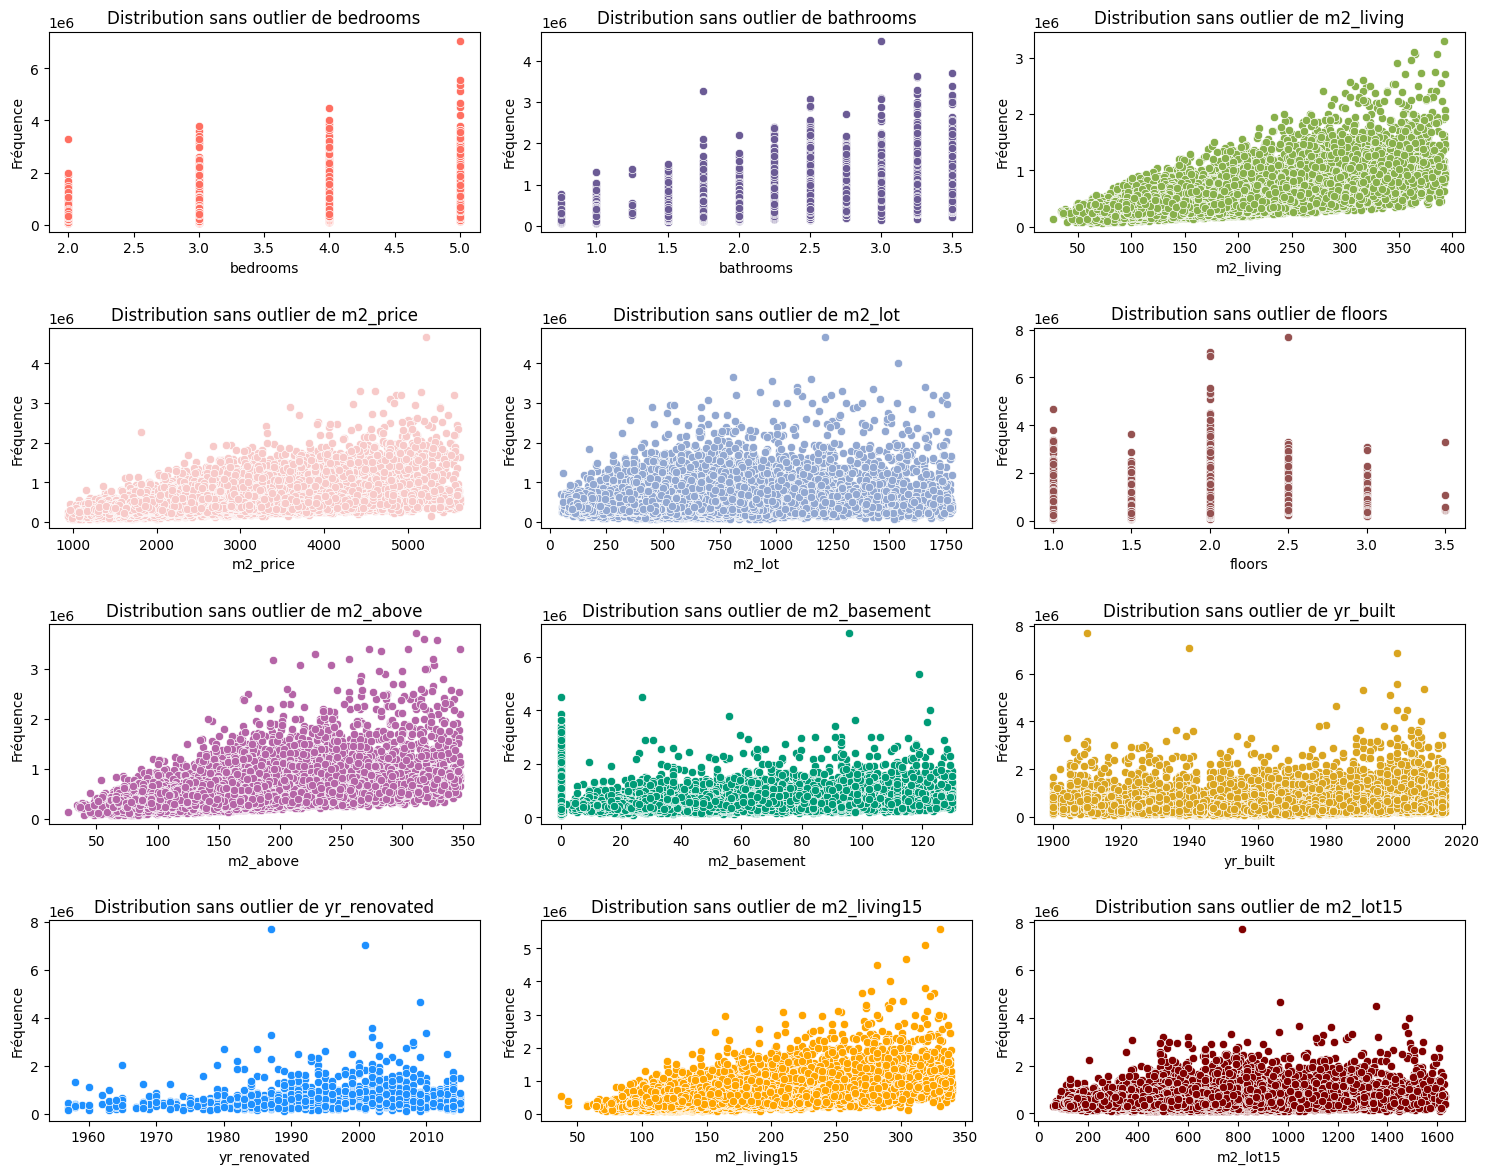

In [18]:
# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Boucle pour générer les graphiques pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives[:-1], colors_quantitative[:-1])):
    
    # Identifier les sous-graphiques
    row = i // 3  # Calcul de la ligne
    col = i % 3   # Calcul de la colonne
    
    # Histogramme des données filtrées (sans valeurs aberrantes)
    Q1 = df_kc[variable].quantile(0.25)
    Q3 = df_kc[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_kc_filtred = df_kc[(df_kc[variable] >= lower_bound) & (df_kc[variable] <= upper_bound)]
    
    sns.scatterplot(data=df_kc_filtred, x=variable, y="price", color=color, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution sans outlier de {variable}')
    axes[row, col].set_ylabel('Fréquence')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

Matrice de corrélation

<Axes: >

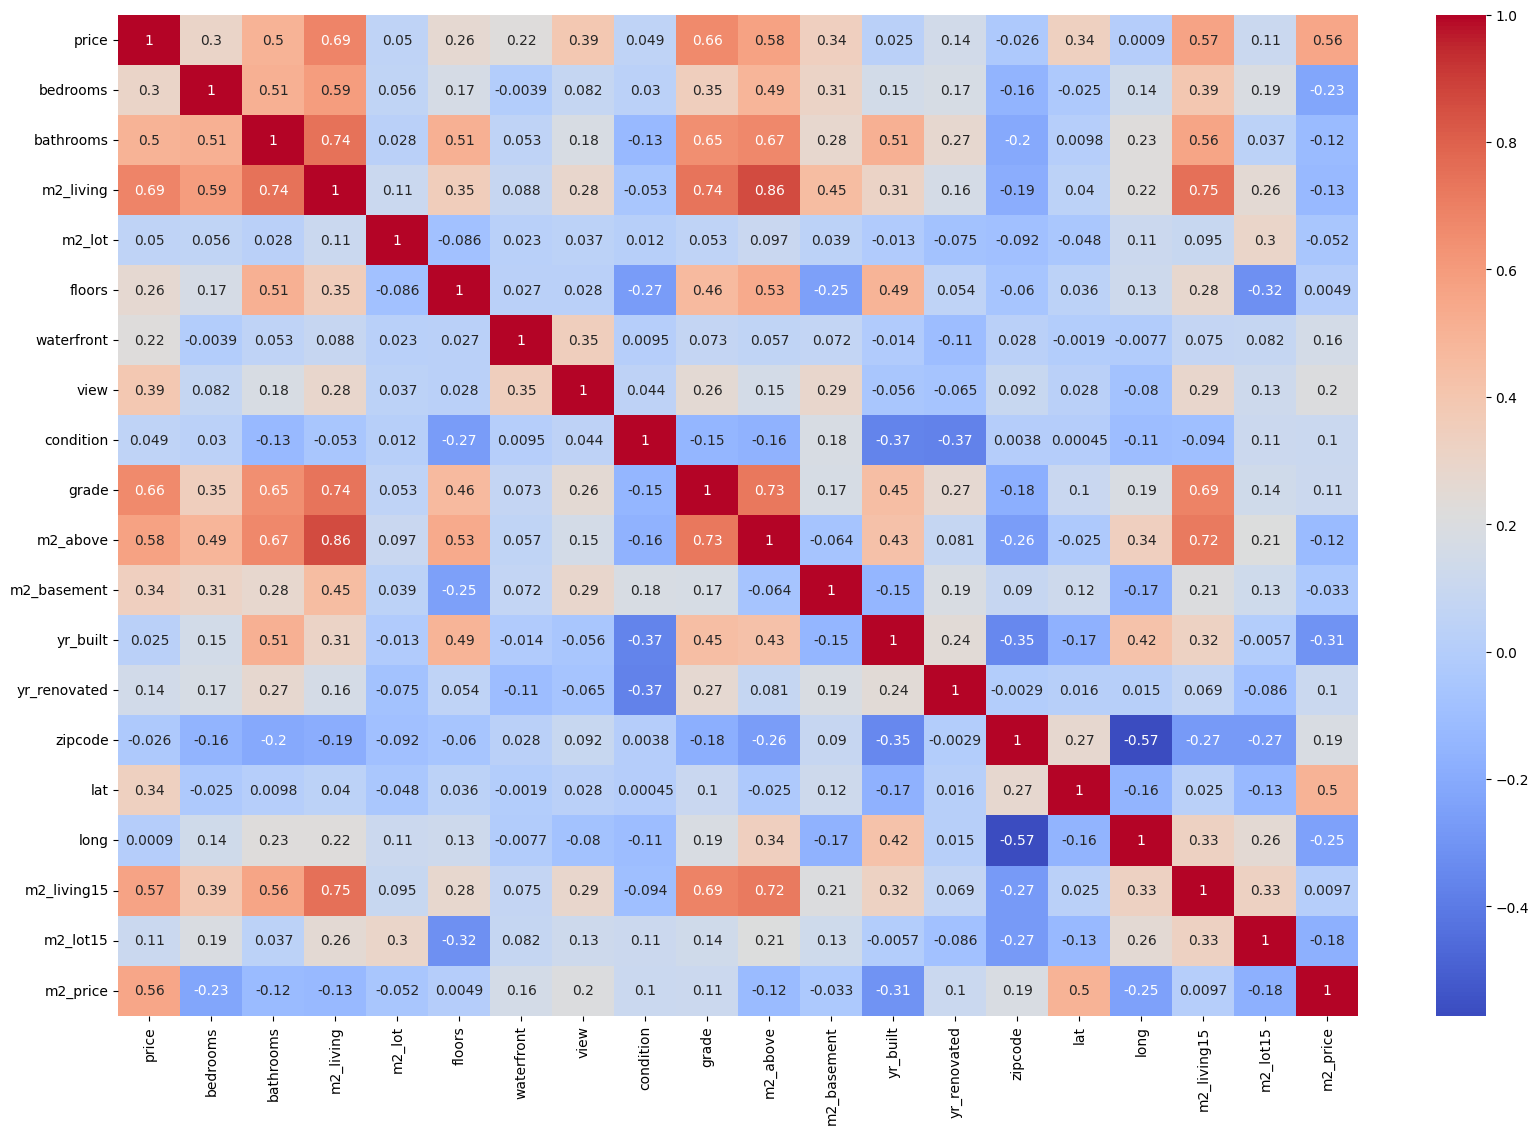

In [21]:
df_kc_filtred_wo_date = df_kc_filtred.copy()
df_kc_filtred_wo_date.drop(columns=["date", "id"], inplace=True)
corr_matrix = df_kc_filtred_wo_date.corr()

plt.figure(figsize=(20,13))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

Liste des variables qui ont une correlation avec price superieur à 0,6

In [40]:
corr_treshold = 0.6

corr_vars = corr_matrix[abs(corr_matrix["price"]) > corr_treshold]

corr_vars_list = corr_vars.index.tolist()
corr_vars_list.remove("price")

corr_vars_list

['m2_living', 'grade']

Les variables qui ont une correlation forte avec la colonne price sont m2_living et grade
Ces variables sembles etre celles qui auront le plus d'impact sur la determination du prix

Liste des couples de variables qui ont une correlation entre elles superieur à 0,8

In [36]:
corr_treshold = 0.8

for variable in corr_matrix.columns:
    corr_vars = corr_matrix[abs(corr_matrix[variable]) > corr_treshold]

    corr_vars_list = corr_vars.index.tolist()
    corr_vars_list.remove(variable)
    
    if corr_vars_list:
        print(f"Les variables corrélées à {variable} sont : {corr_vars_list}")

Les variables corrélées à m2_living sont : ['m2_above']
Les variables corrélées à m2_above sont : ['m2_living']


Il semble qu'il y ait une corrélation significative entre les variables m2_above et m2_living, ce qui est tout à fait logique étant donné leur nature. 
Étant donné que m2_living présente déjà une forte corrélation avec le prix, il serait judicieux de ne pas inclure la variable m2_above. 
Cette décision est renforcée par la pertinence supérieure de m2_living, ce qui rend l'ajout de m2_above redondant et susceptible de perturber notre modèle en introduisant une information double.